In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
base = os.getcwd()

file_path = os.sep.join([base] + ['data'] + ['housing.csv'])
file_path



'd:\\WORK\\COURSERA\\IBM\\supervised ML\\peer review\\data\\housing.csv'

In [3]:
cols = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(file_path, names=cols, sep=r"\s+")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Features: -

1. CRIM - per capita crime rate by town
1. ZN - proportion of residential land zoned for lots over 25,000 sq. ft. 
1. INDUS - proportion of non-retail business acres per town. 
1. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
1. NOX - nitric oxides concentration (parts per 10 million)
1. RM - average number of rooms per dwelling
1. AGE - proportion of owner-occupied units built prior to 1940
1. DIS - weighted distances to five Boston employment centres
1. RAD - index of accessibility to radial highways
1. TAX - full-value property-tax rate per dollars 10,000
1. PTRATIO - pupil-teacher ratio by town
1. B - 1000(Bk - 0. 63)^2 where Bk is the proportion of blacks by town
1. LSTAT - % lower status of the population
1. MEDV - Median value of owner-occupied homes in dollars 1000's

In [4]:
df = data.copy()

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


> - ALL are numerical type data columns. There are no object type features so one hot encoding isn't needed.
> - There are no NULL values since there are 506 non-null values out of 506 rows of data.

## Data Cleaning : -

In [7]:
num_cols = df.columns.to_list()
# desc_col = ['per capita crime rate by town', 'proportion of residential land zoned for lots over 25,000 sq.ft.', 'proportion of non-retail business acres per town.', 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)', 'nitric oxides concentration (parts per 10 million)', 'average number of rooms per dwelling', 'proportion of owner-occupied units built prior to 1940', 'weighted distances to five Boston employment centres', 'index of accessibility to radial highways', 'full-value property-tax rate per dollars 10,000', 'pupil-teacher ratio by town', '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town', '% \lower status of the population', 'Median value of owner-occupied homes in dollars 1000s']

In [8]:
# desc = dict()
# for i,j in num_cols, desc_col:
#     desc.add(i, j)

In [9]:
def box_plot(arr, data):
    for feature in arr:
        plt.figure(figsize=(8, 7))
        ax1 = plt.axes()
        ax2 = plt.axes()
        print('Feature =>', feature, '\n\nFeature Description: -\n')
        display(data[feature].describe().to_frame())
        ax1 = sns.boxplot(x = feature, data = data)
        print('BOXPLOT: -')
        print('Skew Value:', data[feature].skew())
        plt.show()
        print('HISTOGRAM PLOT: -')
        plt.figure(figsize=(8, 7))
        ax2 = sns.histplot(x=feature, data= data)
        plt.show()

### Identifying outliers: -

Feature => CRIM 

Feature Description: -



,CRIM
count,506.000000
mean,3.613524
std,8.601545
min,0.006320
25%,0.082045
50%,0.256510
75%,3.677083
max,88.976200


BOXPLOT: -
Skew Value: 5.223148798243851


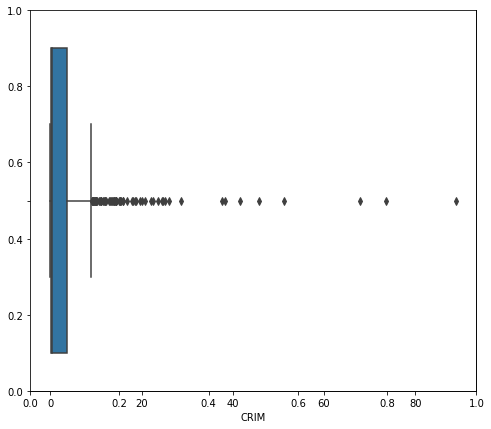

HISTOGRAM PLOT: -


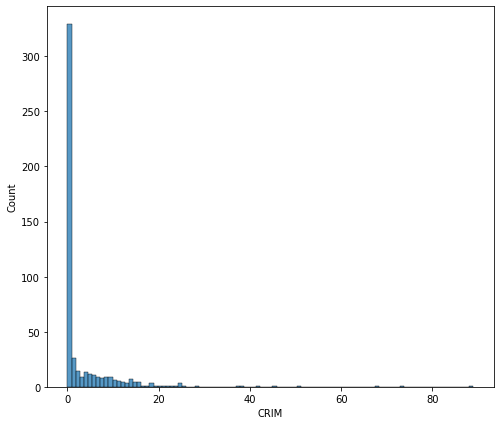

Feature => ZN 

Feature Description: -



,ZN
count,506.000000
mean,11.363636
std,23.322453
min,0.000000
25%,0.000000
50%,0.000000
75%,12.500000
max,100.000000


BOXPLOT: -
Skew Value: 2.2256663227354307


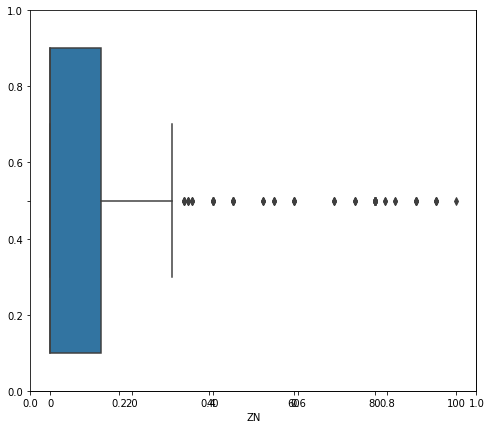

HISTOGRAM PLOT: -


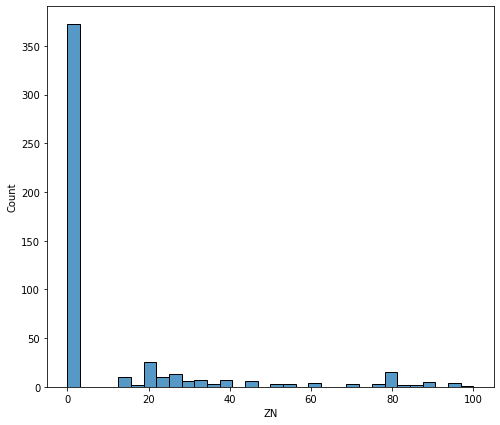

Feature => INDUS 

Feature Description: -



,INDUS
count,506.000000
mean,11.136779
std,6.860353
min,0.460000
25%,5.190000
50%,9.690000
75%,18.100000
max,27.740000


BOXPLOT: -
Skew Value: 0.29502156787351164


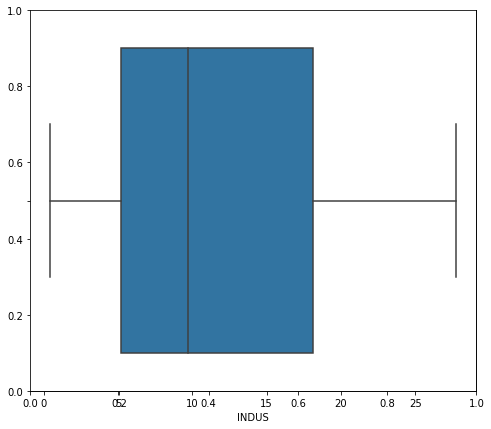

HISTOGRAM PLOT: -


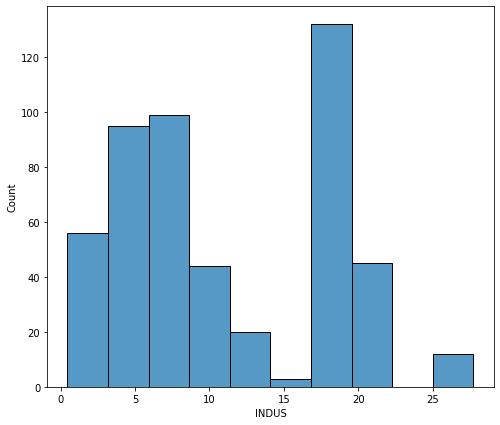

Feature => CHAS 

Feature Description: -



,CHAS
count,506.000000
mean,0.069170
std,0.253994
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


BOXPLOT: -
Skew Value: 3.405904172058746


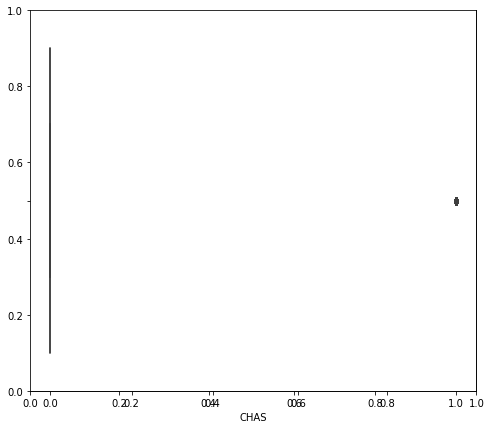

HISTOGRAM PLOT: -


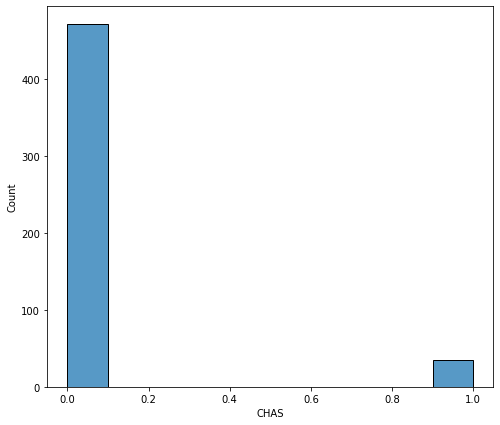

Feature => NOX 

Feature Description: -



,NOX
count,506.000000
mean,0.554695
std,0.115878
min,0.385000
25%,0.449000
50%,0.538000
75%,0.624000
max,0.871000


BOXPLOT: -
Skew Value: 0.7293079225348787


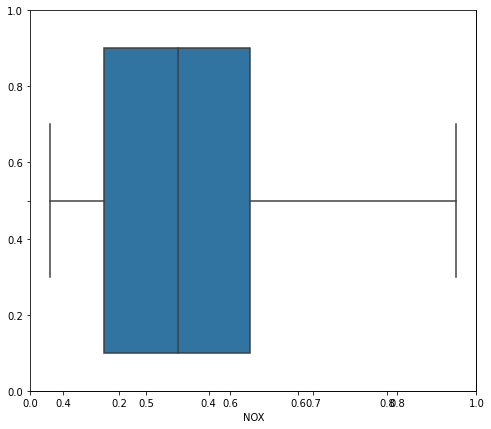

HISTOGRAM PLOT: -


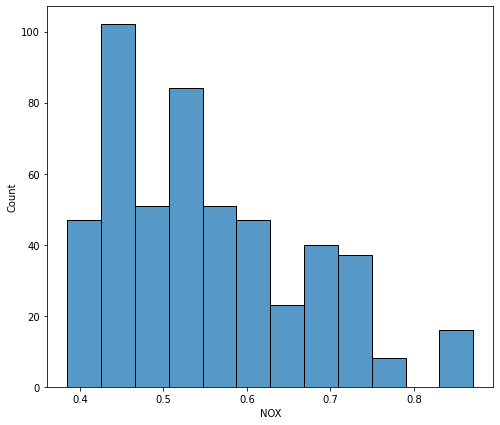

Feature => RM 

Feature Description: -



,RM
count,506.000000
mean,6.284634
std,0.702617
min,3.561000
25%,5.885500
50%,6.208500
75%,6.623500
max,8.780000


BOXPLOT: -
Skew Value: 0.40361213328874385


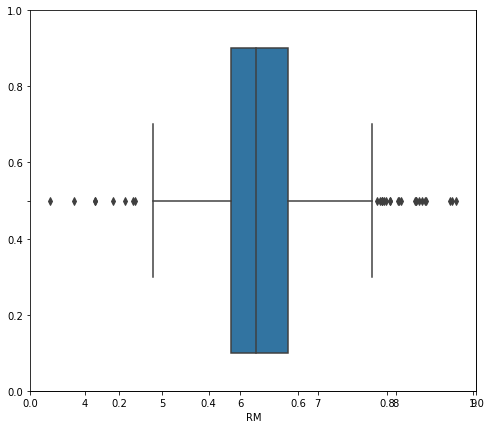

HISTOGRAM PLOT: -


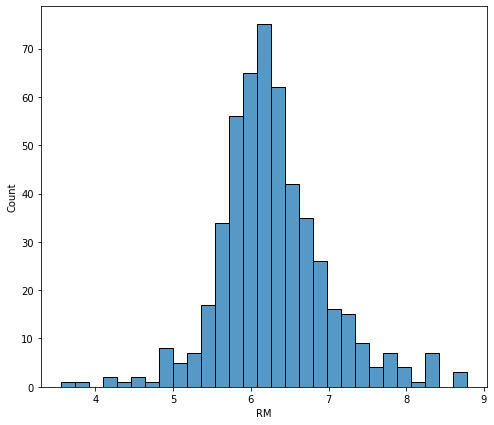

Feature => AGE 

Feature Description: -



,AGE
count,506.000000
mean,68.574901
std,28.148861
min,2.900000
25%,45.025000
50%,77.500000
75%,94.075000
max,100.000000


BOXPLOT: -
Skew Value: -0.5989626398812962


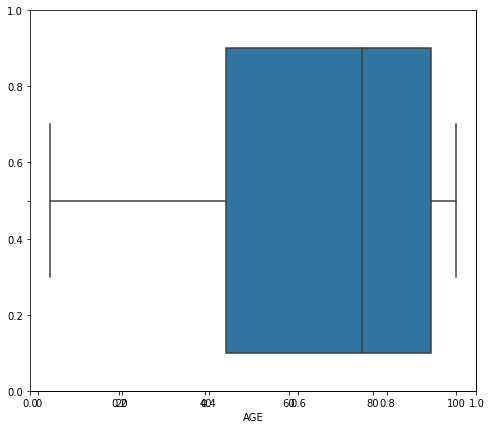

HISTOGRAM PLOT: -


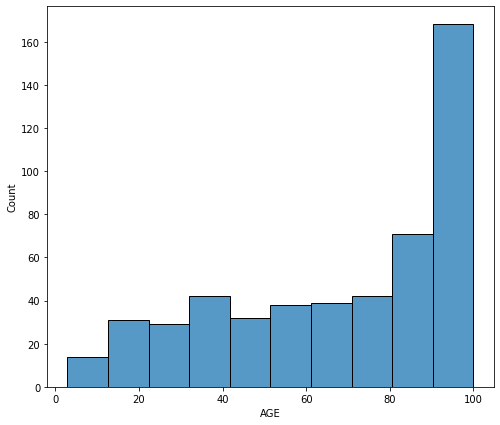

Feature => DIS 

Feature Description: -



,DIS
count,506.000000
mean,3.795043
std,2.105710
min,1.129600
25%,2.100175
50%,3.207450
75%,5.188425
max,12.126500


BOXPLOT: -
Skew Value: 1.0117805793009007


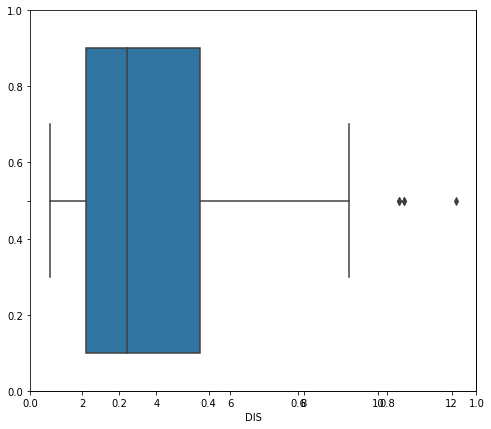

HISTOGRAM PLOT: -


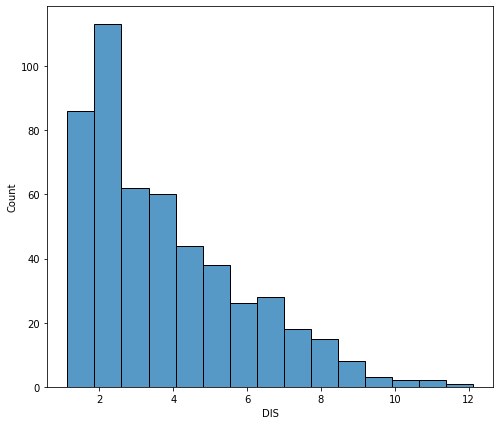

Feature => RAD 

Feature Description: -



,RAD
count,506.000000
mean,9.549407
std,8.707259
min,1.000000
25%,4.000000
50%,5.000000
75%,24.000000
max,24.000000


BOXPLOT: -
Skew Value: 1.0048146482182057


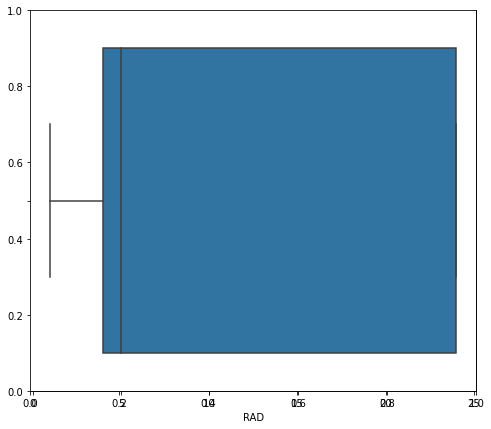

HISTOGRAM PLOT: -


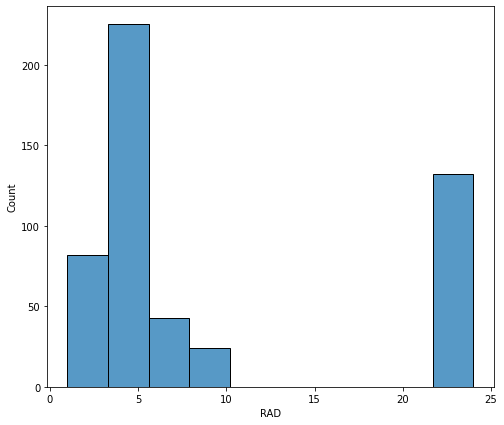

Feature => TAX 

Feature Description: -



,TAX
count,506.000000
mean,408.237154
std,168.537116
min,187.000000
25%,279.000000
50%,330.000000
75%,666.000000
max,711.000000


BOXPLOT: -
Skew Value: 0.669955941795016


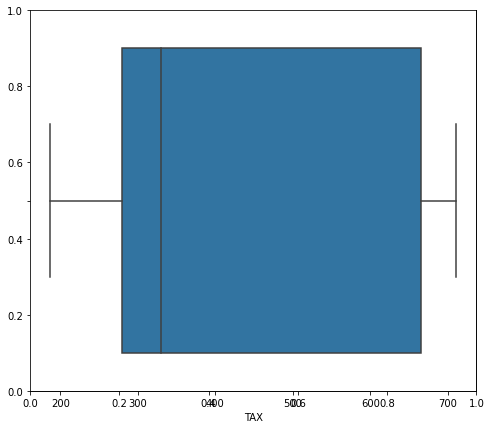

HISTOGRAM PLOT: -


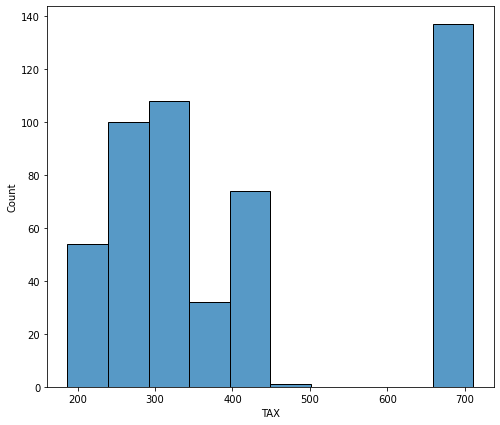

Feature => PTRATIO 

Feature Description: -



,PTRATIO
count,506.000000
mean,18.455534
std,2.164946
min,12.600000
25%,17.400000
50%,19.050000
75%,20.200000
max,22.000000


BOXPLOT: -
Skew Value: -0.8023249268537809


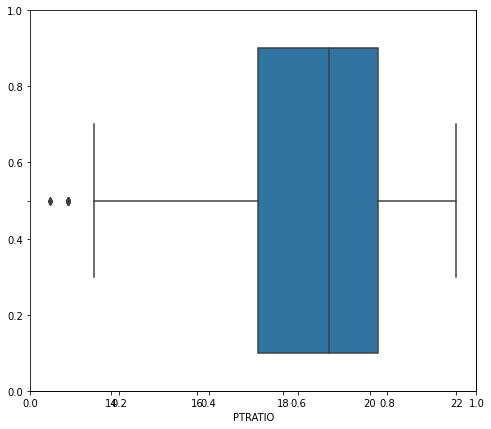

HISTOGRAM PLOT: -


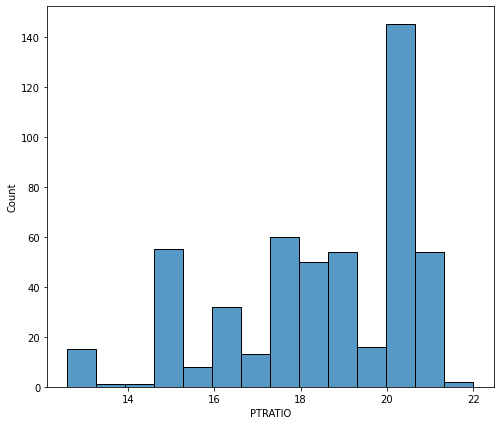

Feature => B 

Feature Description: -



,B
count,506.000000
mean,356.674032
std,91.294864
min,0.320000
25%,375.377500
50%,391.440000
75%,396.225000
max,396.900000


BOXPLOT: -
Skew Value: -2.8903737121414492


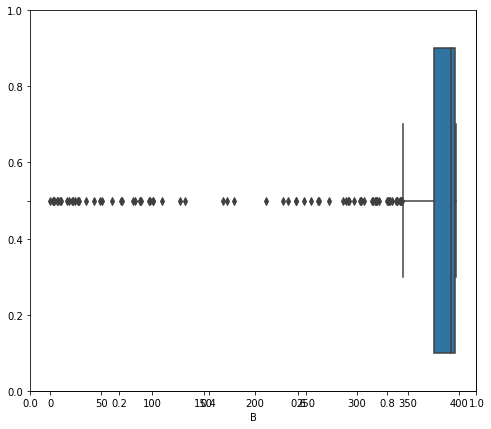

HISTOGRAM PLOT: -


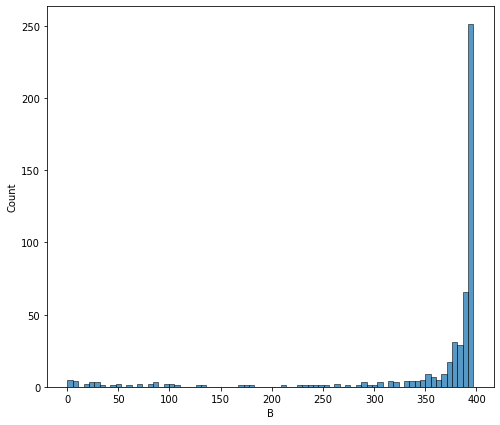

Feature => LSTAT 

Feature Description: -



,LSTAT
count,506.000000
mean,12.653063
std,7.141062
min,1.730000
25%,6.950000
50%,11.360000
75%,16.955000
max,37.970000


BOXPLOT: -
Skew Value: 0.9064600935915367


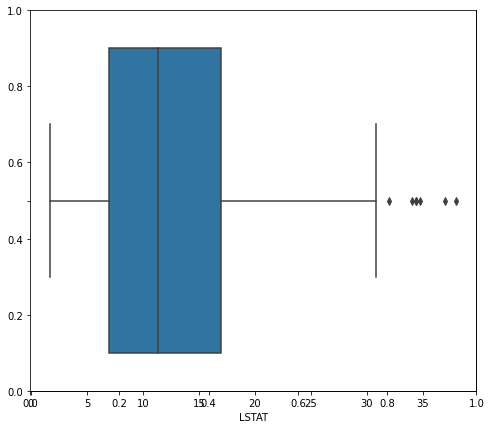

HISTOGRAM PLOT: -


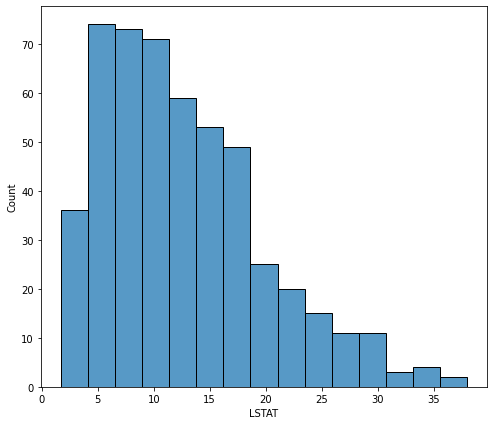

Feature => MEDV 

Feature Description: -



,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


BOXPLOT: -
Skew Value: 1.1080984082549072


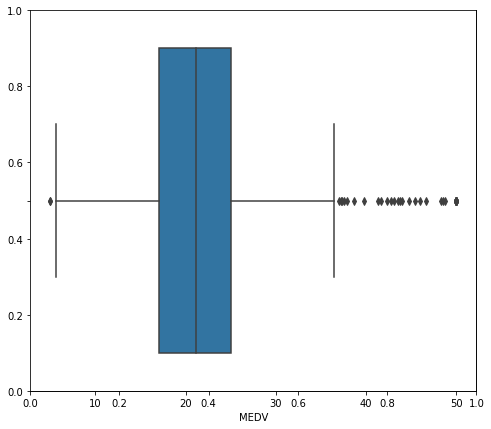

HISTOGRAM PLOT: -


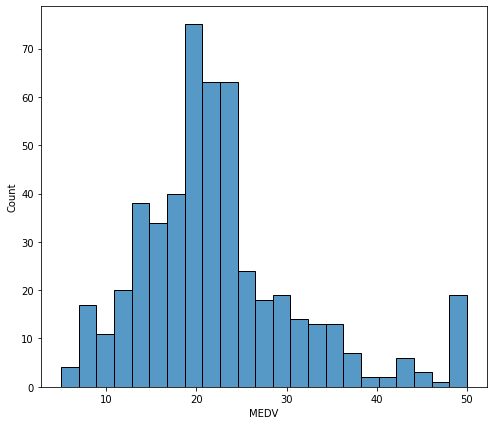

In [10]:
box_plot(arr= num_cols, data= df)

In [11]:
df.shape

(506, 14)

In [12]:
print((df['MEDV'] >= 50).sum())
# print((df['B'] <= 200).sum())

16


In [13]:
df= df[df['MEDV'] < 50]
df.shape

(490, 14)

In [14]:
# corr = df.corr()['MEDV'].abs()
# corr[corr > 0.5].sort_values(ascending=True)

## Birvariate Analysis: -

In [15]:
def bivar(arr, data):
    for feature in arr:
        if feature == 'MEDV':   continue
        plt.figure(figsize= (8,7))
        ax = plt.axes()
        print(feature, 'DESCRIPTION: -')
        display(data[feature].describe().to_frame())
        ax = sns.scatterplot(x= feature, y= 'MEDV', data = data, hue=feature)
        print(feature, 'Vs MEDV : -\n')
        plt.show()

CRIM DESCRIPTION: -


,CRIM
count,490.000000
mean,3.643241
std,8.722154
min,0.006320
25%,0.082045
50%,0.247510
75%,3.647423
max,88.976200


CRIM Vs MEDV : -



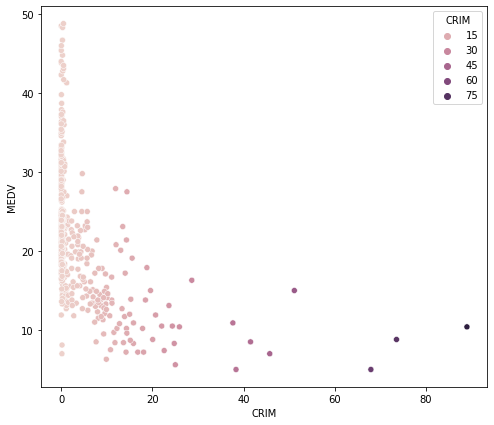

ZN DESCRIPTION: -


,ZN
count,490.000000
mean,11.112245
std,22.844626
min,0.000000
25%,0.000000
50%,0.000000
75%,12.500000
max,100.000000


ZN Vs MEDV : -



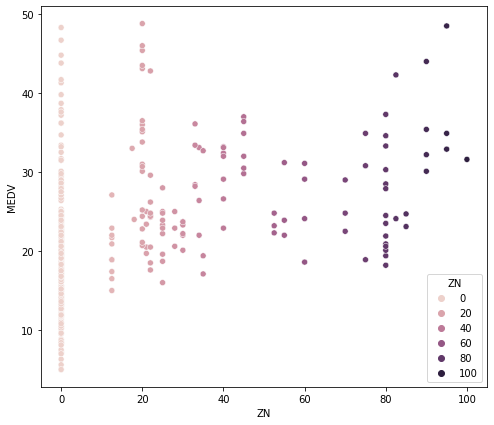

INDUS DESCRIPTION: -


,INDUS
count,490.000000
mean,11.113143
std,6.821302
min,0.740000
25%,5.190000
50%,9.690000
75%,18.100000
max,27.740000


INDUS Vs MEDV : -



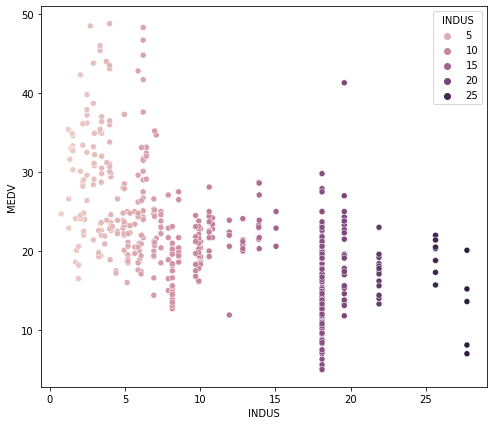

CHAS DESCRIPTION: -


,CHAS
count,490.000000
mean,0.059184
std,0.236209
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


CHAS Vs MEDV : -



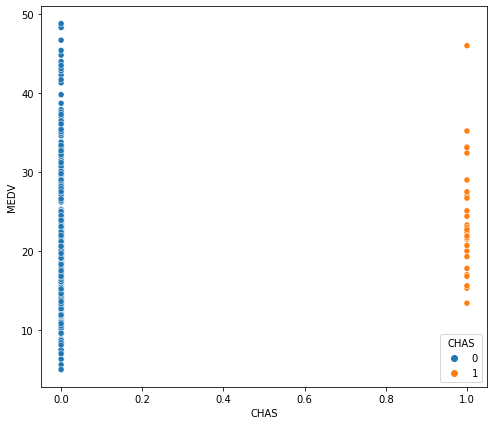

NOX DESCRIPTION: -


,NOX
count,490.000000
mean,0.554307
std,0.116688
min,0.385000
25%,0.449000
50%,0.538000
75%,0.624000
max,0.871000


NOX Vs MEDV : -



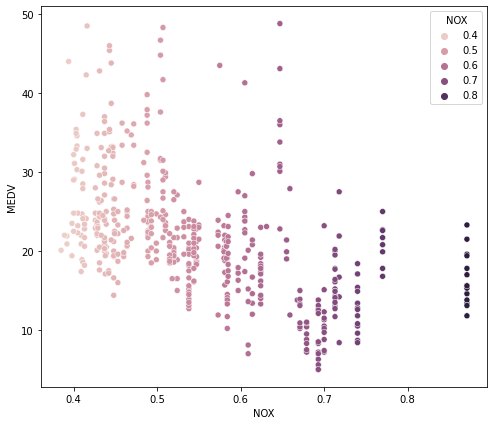

,RM
count,490.000000
mean,6.245471
std,0.653147
min,3.561000
25%,5.881000
50%,6.185000
75%,6.578000
max,8.780000


RM DESCRIPTION: -
RM Vs MEDV : -



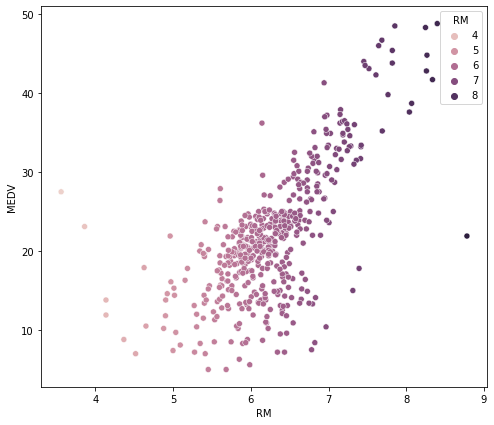

AGE DESCRIPTION: -


,AGE
count,490.00000
mean,68.27898
std,28.16479
min,2.90000
25%,44.55000
50%,76.80000
75%,93.87500
max,100.00000


AGE Vs MEDV : -



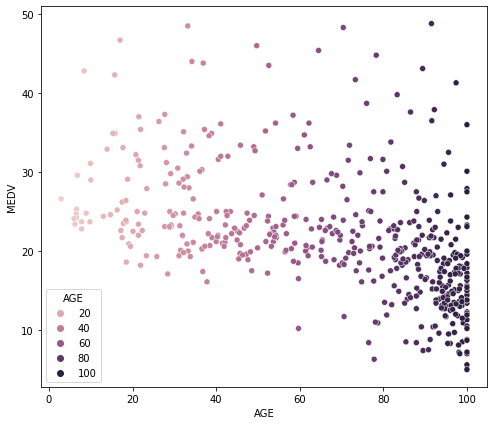

DIS DESCRIPTION: -


,DIS
count,490.000000
mean,3.834519
std,2.109948
min,1.137000
25%,2.111050
50%,3.275900
75%,5.214600
max,12.126500


DIS Vs MEDV : -



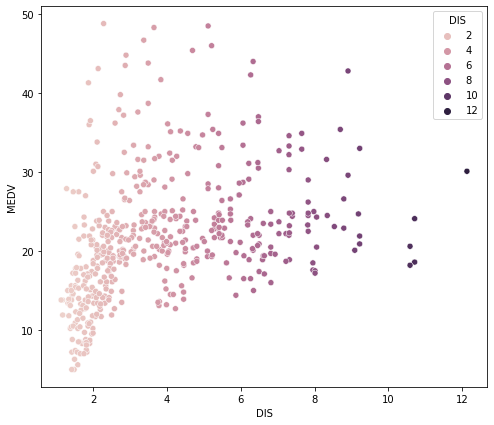

RAD DESCRIPTION: -


,RAD
count,490.000000
mean,9.514286
std,8.691297
min,1.000000
25%,4.000000
50%,5.000000
75%,24.000000
max,24.000000


RAD Vs MEDV : -



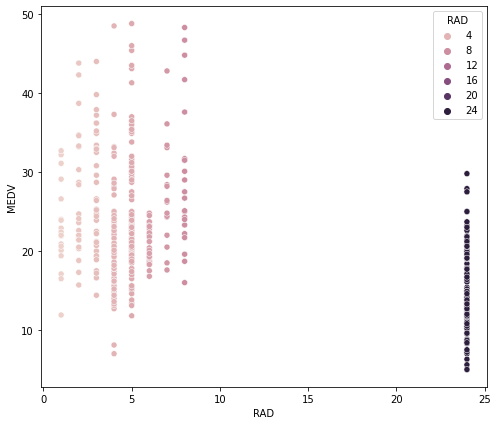

TAX DESCRIPTION: -


,TAX
count,490.000000
mean,408.002041
std,168.065190
min,187.000000
25%,280.250000
50%,330.000000
75%,666.000000
max,711.000000


TAX Vs MEDV : -



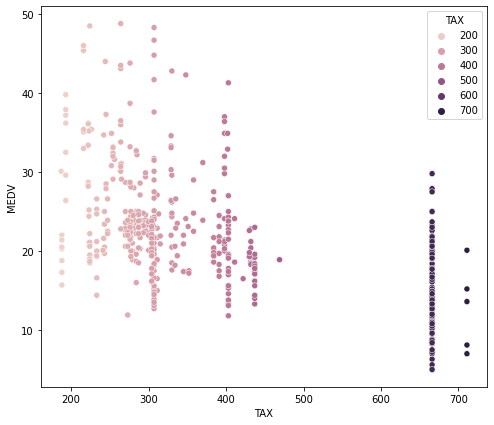

PTRATIO DESCRIPTION: -


,PTRATIO
count,490.000000
mean,18.520000
std,2.110478
min,12.600000
25%,17.400000
50%,19.100000
75%,20.200000
max,22.000000


PTRATIO Vs MEDV : -



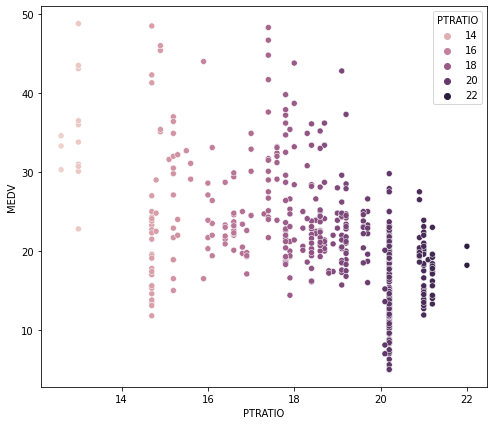

B DESCRIPTION: -


,B
count,490.000000
mean,355.855449
std,92.634273
min,0.320000
25%,375.912500
50%,391.770000
75%,396.322500
max,396.900000


B Vs MEDV : -



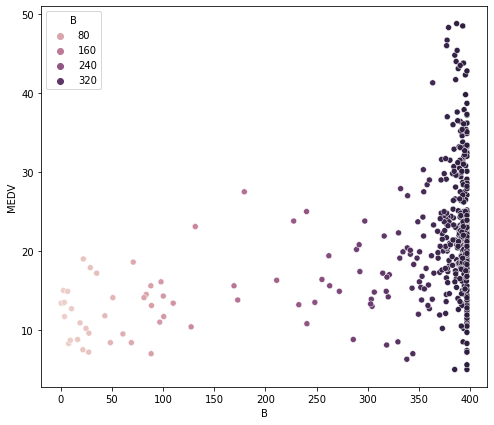

LSTAT DESCRIPTION: -


,LSTAT
count,490.00000
mean,12.92402
std,7.08318
min,1.98000
25%,7.34750
50%,11.67500
75%,17.11750
max,37.97000


LSTAT Vs MEDV : -



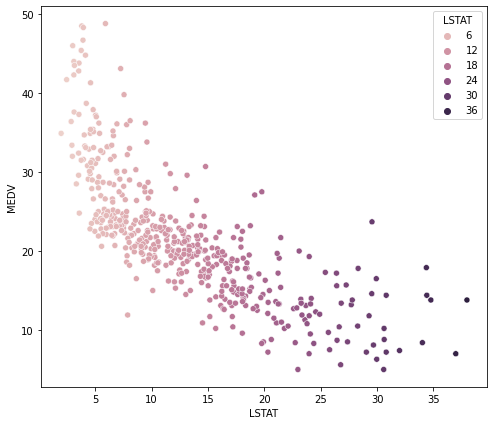

In [16]:
bivar(arr = num_cols, data = df)

In [17]:
skew_vals = df.skew().sort_values()
skew_vals

B         -2.832125
PTRATIO   -0.823673
AGE       -0.587412
RM         0.174716
INDUS      0.321800
TAX        0.680625
NOX        0.753539
MEDV       0.775660
LSTAT      0.907299
DIS        1.003954
RAD        1.014220
ZN         2.241578
CHAS       3.747718
CRIM       5.163722
dtype: float64

In [18]:
skew_vals_tbt = skew_vals[skew_vals.abs() > 1.25]
to_be_trans = skew_vals_tbt.index.to_list()
skew_vals_tbt

B      -2.832125
ZN      2.241578
CHAS    3.747718
CRIM    5.163722
dtype: float64

In [19]:
df2 = df.copy()
df2[to_be_trans] = np.log1p(df2[to_be_trans])
df2[to_be_trans].skew()

B      -4.378797
ZN      1.200490
CHAS    3.747718
CRIM    1.289256
dtype: float64

### log transforing `B` gave much worse skew value and transforming `CHAS` didint affect the skew value at al. So we wont be transforimg them at all. 

In [20]:
to_be_trans.remove('B')
to_be_trans.remove('CHAS')
to_be_trans

['ZN', 'CRIM']

In [21]:
df_trans = df.copy()
df_trans[to_be_trans] = np.log1p(df_trans[to_be_trans])
df_trans[to_be_trans].skew()

ZN      1.200490
CRIM    1.289256
dtype: float64

### `df_trans` is the new data frame with log transformed values for `ZN` & `CRIM`.

In [22]:
df_trans.skew().sort_values()

B         -2.832125
PTRATIO   -0.823673
AGE       -0.587412
RM         0.174716
INDUS      0.321800
TAX        0.680625
NOX        0.753539
MEDV       0.775660
LSTAT      0.907299
DIS        1.003954
RAD        1.014220
ZN         1.200490
CRIM       1.289256
CHAS       3.747718
dtype: float64

Feature => CRIM 

Feature Description: -



,CRIM
count,490.000000
mean,0.807993
std,1.028565
min,0.006300
25%,0.078853
50%,0.221148
75%,1.536265
max,4.499545


BOXPLOT: -
Skew Value: 1.2892563760603808


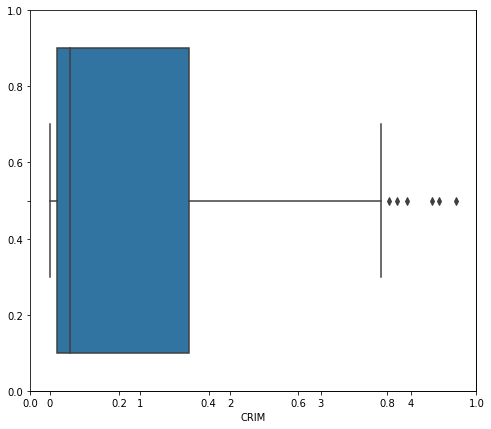

HISTOGRAM PLOT: -


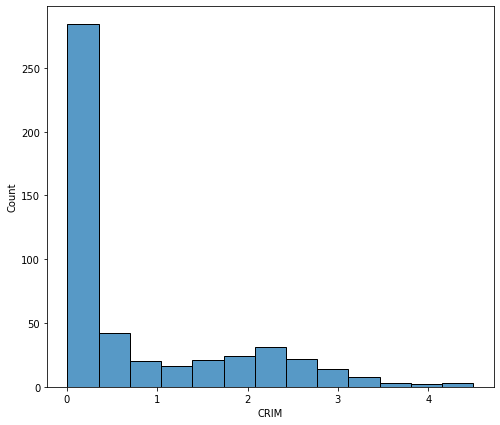

Feature => ZN 

Feature Description: -



,ZN
count,490.000000
mean,0.945104
std,1.611798
min,0.000000
25%,0.000000
50%,0.000000
75%,2.602690
max,4.615121


BOXPLOT: -
Skew Value: 1.200489529474767


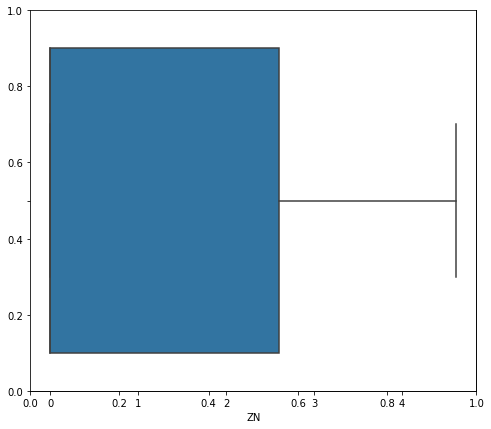

HISTOGRAM PLOT: -


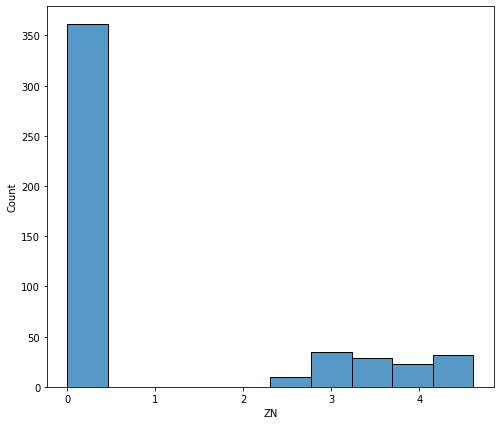

Feature => INDUS 

Feature Description: -



,INDUS
count,490.000000
mean,11.113143
std,6.821302
min,0.740000
25%,5.190000
50%,9.690000
75%,18.100000
max,27.740000


BOXPLOT: -
Skew Value: 0.3218004592170549


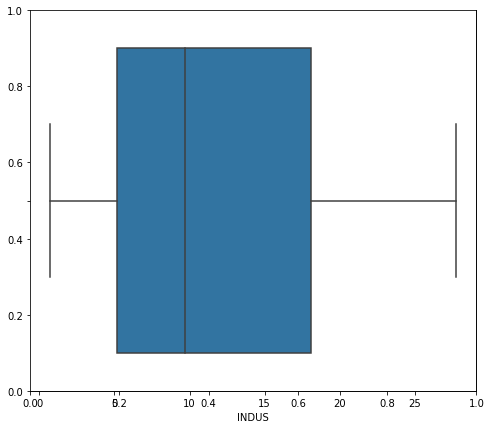

HISTOGRAM PLOT: -


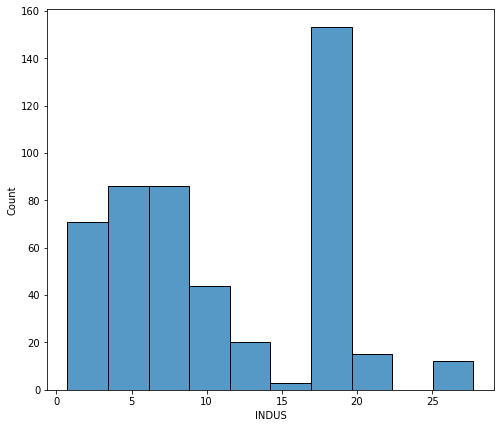

Feature => CHAS 

Feature Description: -



,CHAS
count,490.000000
mean,0.059184
std,0.236209
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


BOXPLOT: -
Skew Value: 3.74771824274625


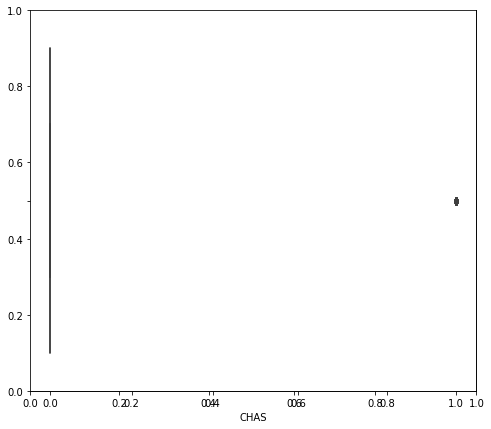

HISTOGRAM PLOT: -


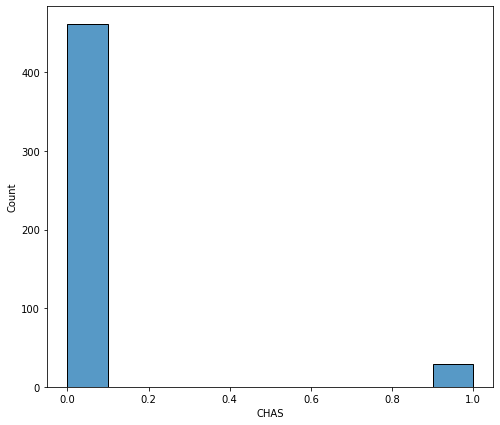

Feature => NOX 

Feature Description: -



,NOX
count,490.000000
mean,0.554307
std,0.116688
min,0.385000
25%,0.449000
50%,0.538000
75%,0.624000
max,0.871000


BOXPLOT: -
Skew Value: 0.7535393737716778


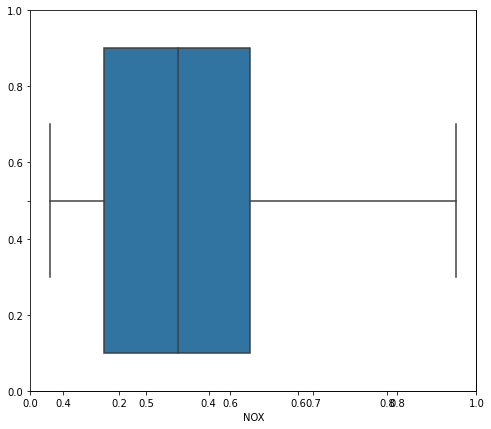

HISTOGRAM PLOT: -


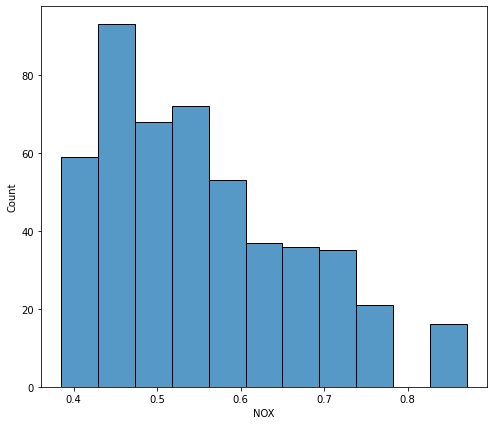

Feature => RM 

Feature Description: -



,RM
count,490.000000
mean,6.245471
std,0.653147
min,3.561000
25%,5.881000
50%,6.185000
75%,6.578000
max,8.780000


BOXPLOT: -
Skew Value: 0.17471584247933417


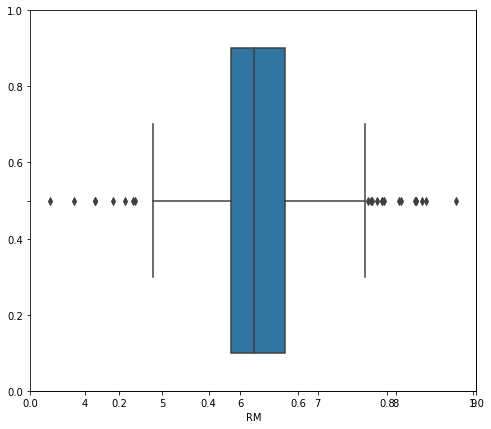

HISTOGRAM PLOT: -


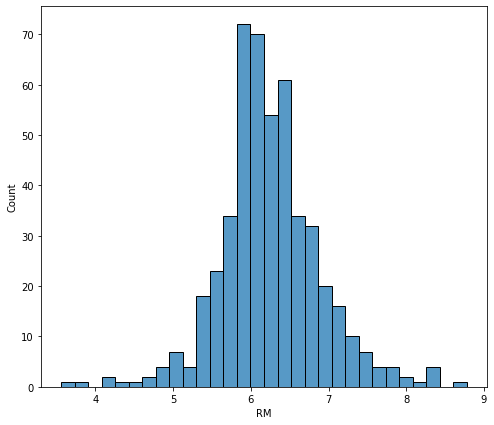

Feature => AGE 

Feature Description: -



,AGE
count,490.00000
mean,68.27898
std,28.16479
min,2.90000
25%,44.55000
50%,76.80000
75%,93.87500
max,100.00000


BOXPLOT: -
Skew Value: -0.5874118645937677


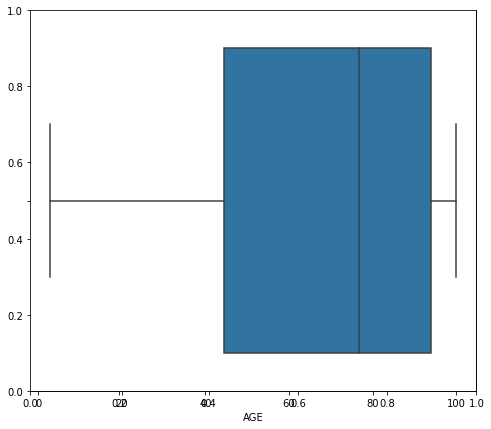

HISTOGRAM PLOT: -


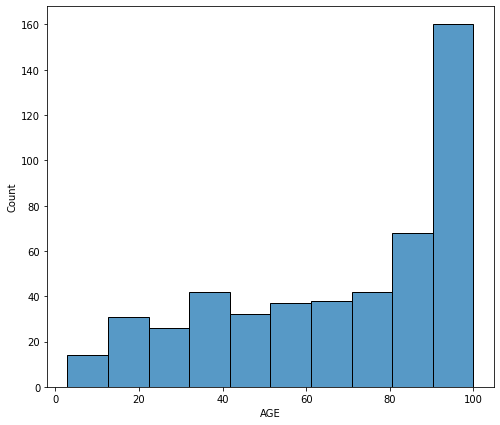

Feature => DIS 

Feature Description: -



,DIS
count,490.000000
mean,3.834519
std,2.109948
min,1.137000
25%,2.111050
50%,3.275900
75%,5.214600
max,12.126500


BOXPLOT: -
Skew Value: 1.0039544969135474


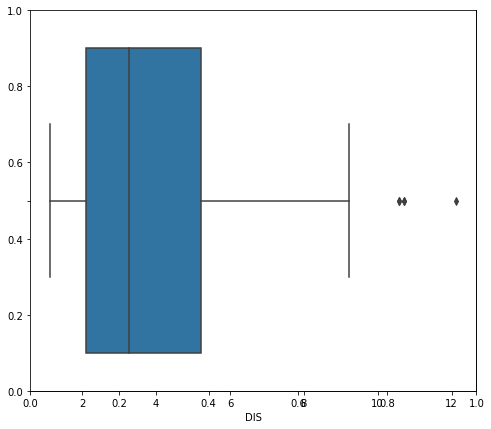

HISTOGRAM PLOT: -


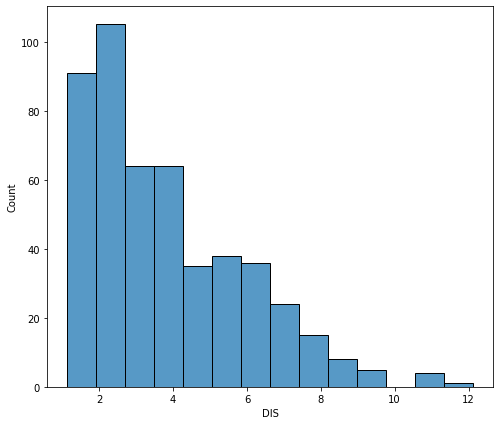

Feature => RAD 

Feature Description: -



,RAD
count,490.000000
mean,9.514286
std,8.691297
min,1.000000
25%,4.000000
50%,5.000000
75%,24.000000
max,24.000000


BOXPLOT: -
Skew Value: 1.014219500743249


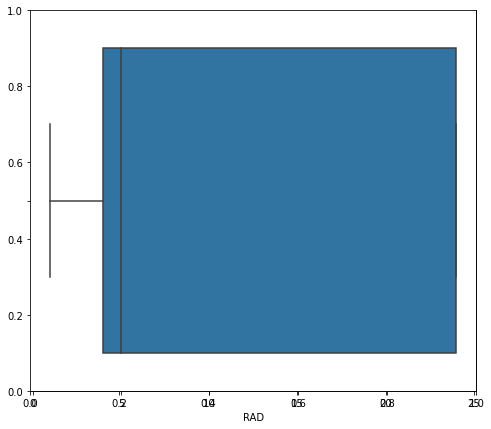

HISTOGRAM PLOT: -


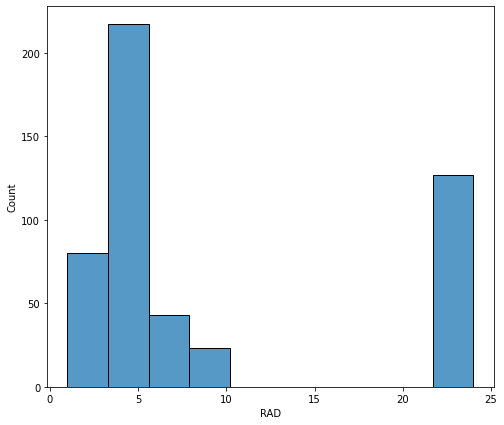

Feature => TAX 

Feature Description: -



,TAX
count,490.000000
mean,408.002041
std,168.065190
min,187.000000
25%,280.250000
50%,330.000000
75%,666.000000
max,711.000000


BOXPLOT: -
Skew Value: 0.6806253644108071


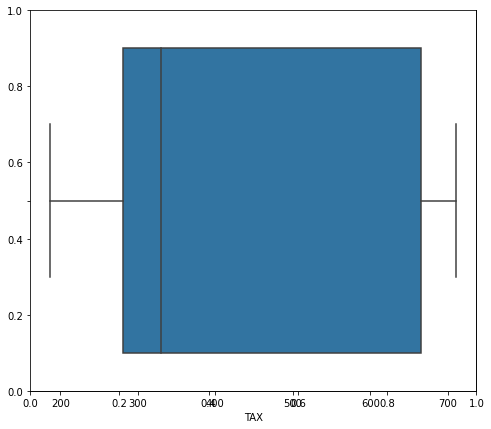

HISTOGRAM PLOT: -


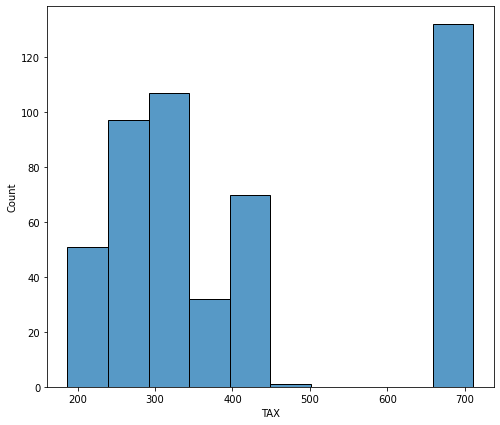

Feature => PTRATIO 

Feature Description: -



,PTRATIO
count,490.000000
mean,18.520000
std,2.110478
min,12.600000
25%,17.400000
50%,19.100000
75%,20.200000
max,22.000000


BOXPLOT: -
Skew Value: -0.8236732809760914


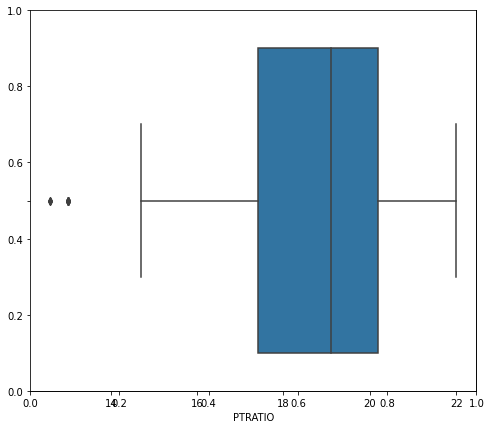

HISTOGRAM PLOT: -


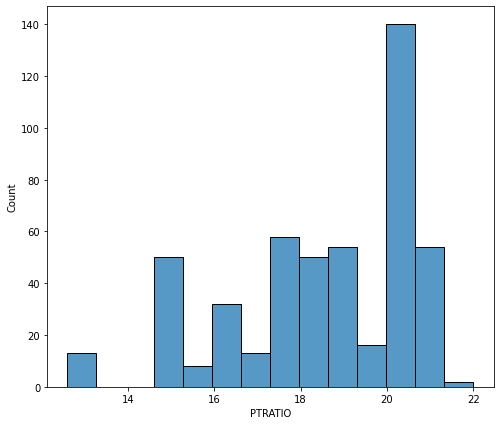

Feature => B 

Feature Description: -



,B
count,490.000000
mean,355.855449
std,92.634273
min,0.320000
25%,375.912500
50%,391.770000
75%,396.322500
max,396.900000


BOXPLOT: -
Skew Value: -2.832124612842033


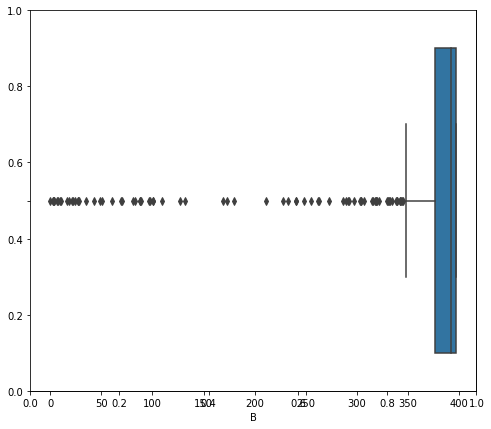

HISTOGRAM PLOT: -


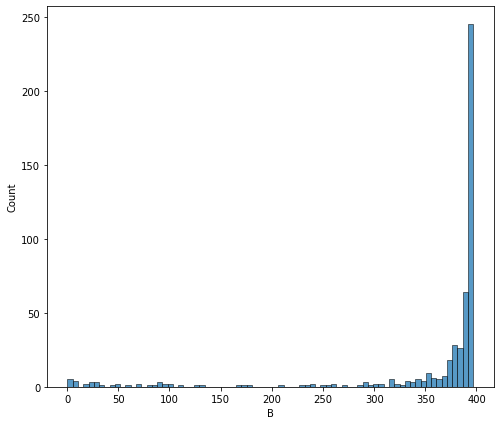

Feature => LSTAT 

Feature Description: -



,LSTAT
count,490.00000
mean,12.92402
std,7.08318
min,1.98000
25%,7.34750
50%,11.67500
75%,17.11750
max,37.97000


BOXPLOT: -
Skew Value: 0.9072987156990929


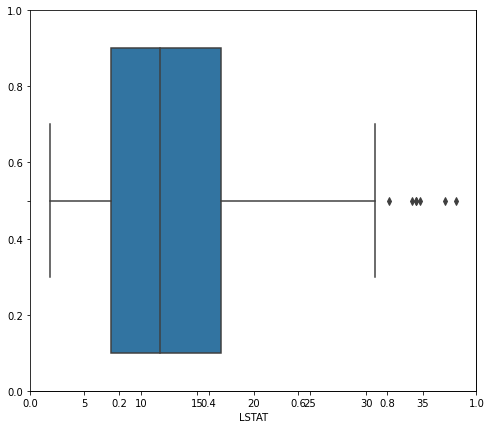

HISTOGRAM PLOT: -


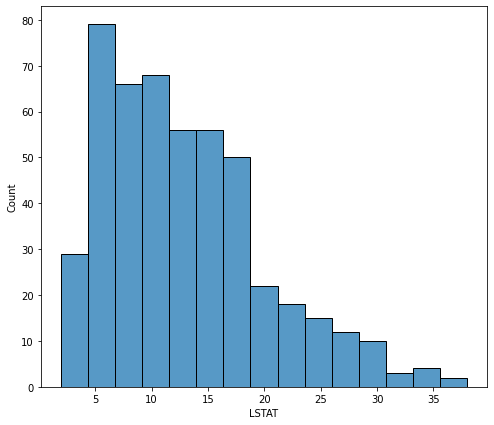

Feature => MEDV 

Feature Description: -



,MEDV
count,490.000000
mean,21.635918
std,7.865301
min,5.000000
25%,16.700000
50%,20.900000
75%,24.675000
max,48.800000


BOXPLOT: -
Skew Value: 0.7756600947648027


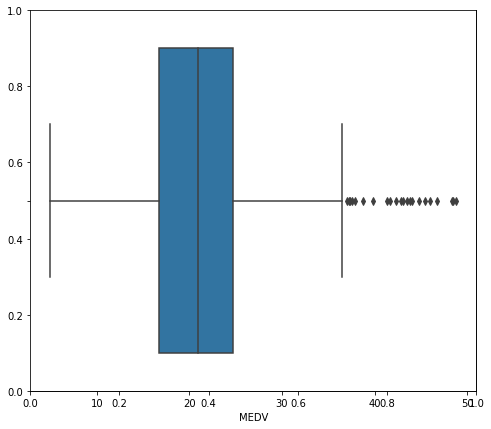

HISTOGRAM PLOT: -


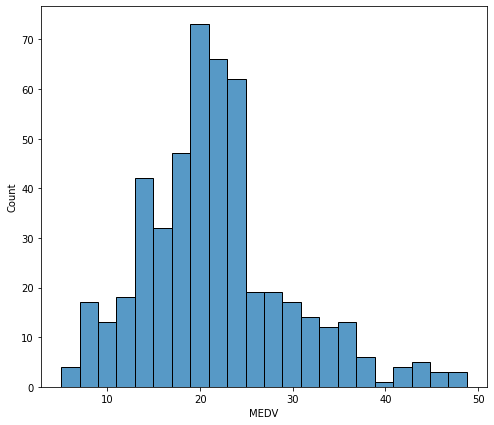

In [23]:
box_plot(arr=num_cols ,data= df_trans)

## INSIGHTS: -

# MODEL BUILDING: -

In [24]:
df_trans.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006300,2.944439,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.026944,0.000000,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.026924,0.000000,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.031857,0.000000,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.066770,0.000000,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [25]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [26]:
data = df_trans
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006300,2.944439,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.026944,0.000000,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.026924,0.000000,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.031857,0.000000,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.066770,0.000000,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [27]:
target = 'MEDV'
X = data.drop(target, axis=1)
Y = data[target].to_frame()

In [28]:
kf = KFold(shuffle=True, random_state=72000 ,n_splits=4)

In [46]:
estimator1 = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
    ])

estimator2 = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('ridge_regression', Ridge())
    ])

estimator3 = Pipeline([
    ('polynomial_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('lasso_regression', Lasso(max_iter=50000))
    ])

params1 = {
    'polynomial_features__degree': [1, 2, 3]
}

params2 = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(0.005, 2, 10)
}

params3 = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(0.005, 1, 10)#[0.005, 0.01, 0.1, 0.5]
}

model1 = GridSearchCV(estimator1, params1, cv=kf)
model2 = GridSearchCV(estimator2, params2, cv=kf)
model3 = GridSearchCV(estimator3, params3, cv=kf)


array([0.005     , 0.00900824, 0.01622968, 0.02924018, 0.05268051,
       0.09491175, 0.17099759, 0.30807751, 0.55504731, 1.        ])

## Model 1: Linear Regression: -

In [47]:
model1.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=4, random_state=72000, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'polynomial_features__degree': [1, 2, 3]})

## Model 2: Ridge Regression: -

In [48]:
model2.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=4, random_state=72000, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([0.005     , 0.00972944, 0.0189324 , 0.03684031, 0.07168712,
       0.13949508, 0.27144176, 0.52819519, 1.02780853, 2.        ])})

## Model 3: Lasso Regression: -

In [49]:
model3.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=4, random_state=72000, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('lasso_regression',
                                        Lasso(max_iter=50000))]),
             param_grid={'lasso_regression__alpha': array([0.005     , 0.00900824, 0.01622968, 0.02924018, 0.05268051,
       0.09491175, 0.17099759, 0.30807751, 0.55504731, 1.        ]),
                         'polynomial_features__degree': [1, 2, 3]})

In [50]:
print('Linear Regression:', model1.best_score_, model1.best_params_)
print('Ridge Regression:', model2.best_score_, model2.best_params_)
print('Lasso Regression:', model3.best_score_, model3.best_params_)

Linear Regression: 0.7470139044782667 {'polynomial_features__degree': 1}
Ridge Regression: 0.8808211652042433 {'polynomial_features__degree': 2, 'ridge_regression__alpha': 0.5281951900505008}
Lasso Regression: 0.8836193703119349 {'lasso_regression__alpha': 0.005, 'polynomial_features__degree': 2}


> ### Since r2 score for model 3 is the best one so far, with polynomial features degree as 2 and lasso_regression__alpha value as 0.005, we choose Lasso model to be the best one out of the three models created.

## Model Results: -

In [51]:
y_pred_1 = model1.predict(X)
y_pred_2 = model2.predict(X)
y_pred_3 = model3.predict(X)
print('Model 1 r2 score : -', r2_score(y_pred_1, Y))
print('Model 2 r2 score : -', r2_score(y_pred_2, Y))
print('Model 3 r2 score : -', r2_score(y_pred_3, Y))

Model 1 r2 score : - 0.7062193513078339
Model 2 r2 score : - 0.9132453428809181
Model 3 r2 score : - 0.9077460583181127


In [52]:
lasso_coef = model3.best_estimator_.named_steps['lasso_regression'].coef_
lasso_features = model3.best_estimator_.named_steps['polynomial_features'].get_feature_names_out(input_features = X.columns)

In [53]:
best_model = Pipeline([
    ('more_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('lasso_regression', Lasso(alpha=0.005, max_iter=50000))
])

best_model.fit(X, Y)

Pipeline(steps=[('more_features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('lasso_regression', Lasso(alpha=0.005, max_iter=50000))])

In [54]:
r2_score(best_model.predict(X), Y)

0.9077460583181127

In [55]:
first = pd.DataFrame(zip(best_model.named_steps['more_features'].get_feature_names_out(input_features = X.columns), best_model.named_steps['lasso_regression'].coef_))
first.columns = ['features', 'weights']
first.sort_values(by='weights')


,features,weights
73,RM TAX,-10.483539
8,DIS,-9.156366
52,CHAS RM,-4.126940
82,AGE B,-3.917437
49,INDUS LSTAT,-3.653753
...,...,...
54,CHAS DIS,3.169275
84,DIS^2,3.197117
16,CRIM INDUS,5.625170
96,TAX PTRATIO,9.415045


In [56]:
print('Number of coefficients zeroed out by Lasso:', (first['weights'] == 0).sum())

Number of coefficients zeroed out by Lasso: 43


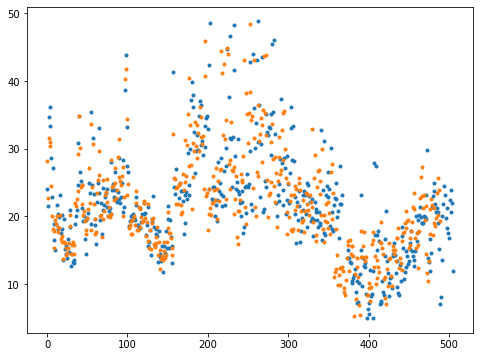

In [119]:
plt.figure(figsize=(8,6))
plt.plot(Y.MEDV, marker = '.', linestyle= ' ')
plt.plot(best_model.predict(X), marker = '.', linestyle= ' ')
plt.show()

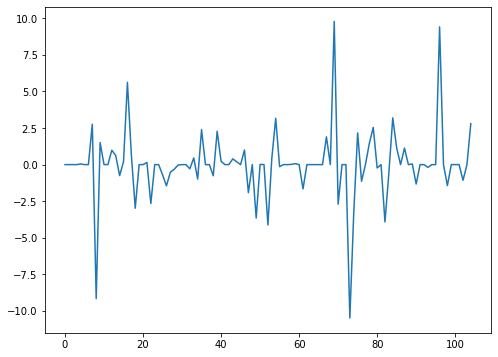

In [122]:
plt.figure(figsize=(8,6))
plt.plot(best_model.named_steps['lasso_regression'].coef_)

## Due to Lasso Regression the scale of variance isnt huge and the complexity of the model has been reduced.